# Exploratory Data Analysis

### Three important steps :

* Understanding the data
* Cleaning the data
* Find the relationship between data

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

### STEP 1 : Understanding the data

In [2]:

data=pd.read_csv('/kaggle/input/titanic/train.csv')
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Number of passengers (Collecting Data)
print("Number of passengers = ",str(len(data.index)))
#print(titanic_data['Survived'].sum())


Number of passengers =  891


In [5]:

# To get the information about titanic data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### STEP 2 : Cleaning the Data

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

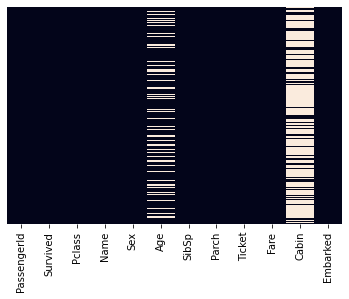

In [11]:
# Checking the data for no nan values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)


### Removing columns with missing values (cleaning the data)

In [12]:
newdata = data.drop(['Cabin','PassengerId'], axis=1)
newdata.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
newdata.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [14]:
newdata.shape

(891, 10)

In [15]:
newdata.dropna().shape

(712, 10)

In [16]:
newdata = newdata.dropna()

In [17]:
newdata.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

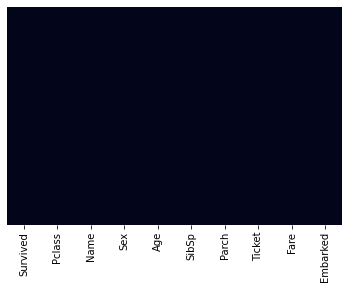

In [18]:
# Checking the data for no nan values
sns.heatmap(newdata.isnull(),yticklabels=False,cbar=False)


In [19]:
newdata['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [20]:
newdata.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Checking for outliers

In [21]:
newdata.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

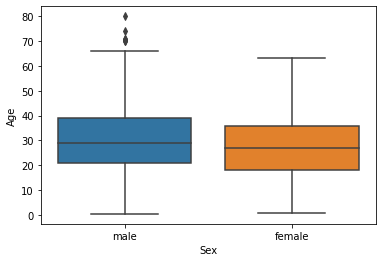

In [22]:
sns.boxplot(x ='Sex', y='Age', data=newdata)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

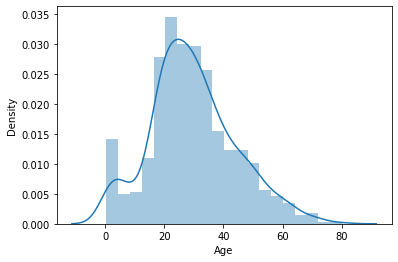

In [23]:
sns.distplot(newdata['Age'])

### Removing the outliers


In [24]:
newdata['Age'].mean()

29.64209269662921

In [25]:
data['Age'] = newdata['Age'] < 69
data['Age'].mean()


0.9901685393258427

In [26]:
newdata = newdata[newdata['Age']<69]
newdata.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
newdata.shape

(705, 10)

In [28]:
newdata['Age'].mean()

29.21797163120567

<AxesSubplot:xlabel='Sex', ylabel='Age'>

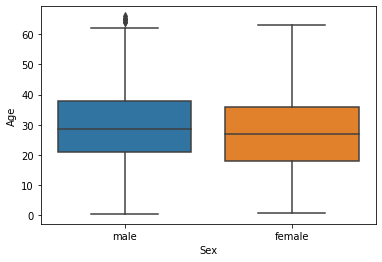

In [29]:
sns.boxplot(x ='Sex', y='Age', data=newdata)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

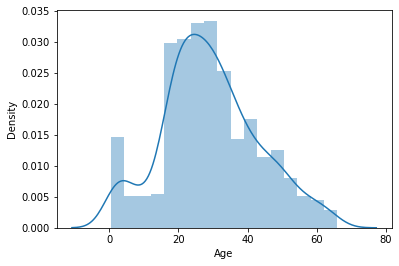

In [30]:
sns.distplot(newdata['Age'])

<AxesSubplot:>

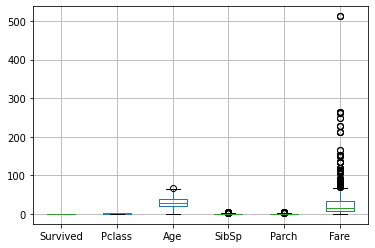

In [31]:
newdata.boxplot()

In [32]:
data['Age'] = newdata['Fare'] < 300
data['Age'].mean()

0.9957446808510638

<AxesSubplot:>

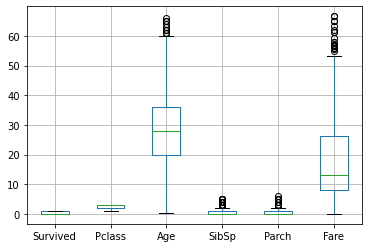

In [33]:
newdata = newdata[newdata['Fare']<69]
newdata.boxplot()

<AxesSubplot:>

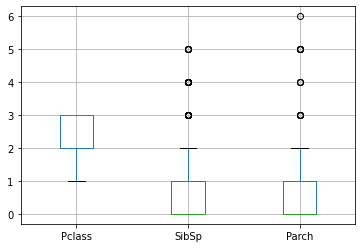

In [34]:
newdata.boxplot(column=['Pclass','SibSp','Parch'])

In [35]:
# log transformation
newdata['fare_log'] = np.log(newdata['Fare'])
newdata.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_log
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.981001
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.070022
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.972177
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.085672
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,3.948596


In [36]:
newdata[['SibSp']].groupby(['SibSp']).agg({'SibSp':['count']})

,SibSp
,count
SibSp,
0,418
1,141
2,18
3,9
4,18
5,5


In [37]:
newdata[['Parch']].groupby(['Parch']).agg({'Parch':['count']})

,Parch
,count
Parch,
0,456
1,90
2,49
3,5
4,3
5,5
6,1


<AxesSubplot:>

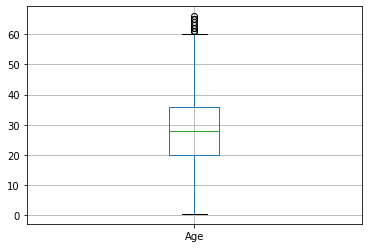

In [38]:
newdata.boxplot(column=['Age'])

### Kurtosis and Skewness

* Kurtosis is a measure of spread of tail of a data distribution. There are 3 types of kurtosis - high, medium and low. 

In [39]:
newdata.kurt()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived    -1.643604
Pclass      -0.622273
Age         -0.017044
SibSp        7.352063
Parch       10.527309
Fare         1.358940
fare_log          NaN
dtype: float64

* Skewness is the measure of asymmetry of distribution. Positive value of skew is right skewed and negative value is left skewed.

In [40]:
newdata.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived    0.601502
Pclass     -0.882995
Age         0.253811
SibSp       2.632998
Parch       2.877652
Fare        1.393232
fare_log         NaN
dtype: float64

<AxesSubplot:ylabel='Frequency'>

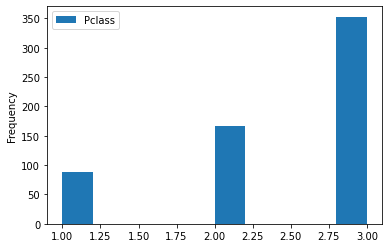

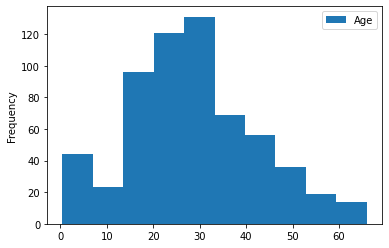

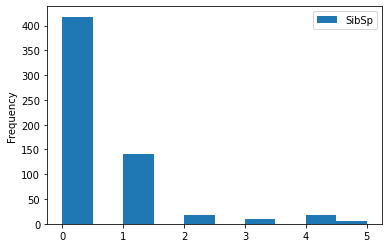

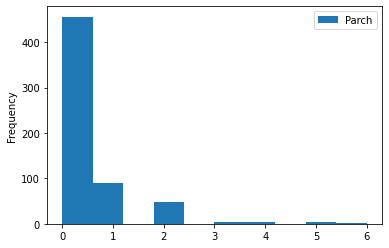

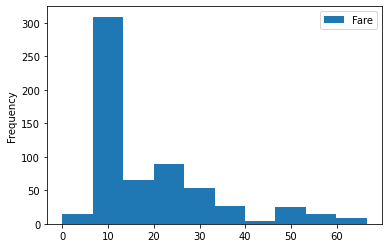

In [41]:
newdata[['Pclass']].plot.hist()
newdata[['Age']].plot.hist()
newdata[['SibSp']].plot.hist()
newdata[['Parch']].plot.hist()
newdata[['Fare']].plot.hist()

<AxesSubplot:ylabel='Density'>

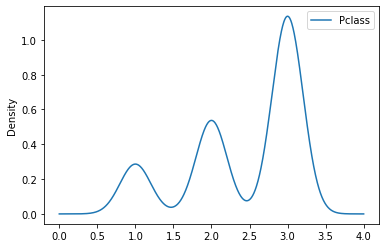

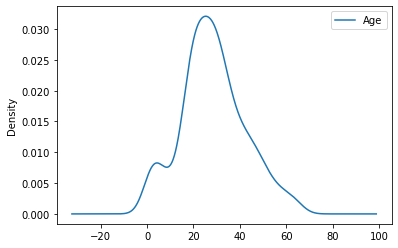

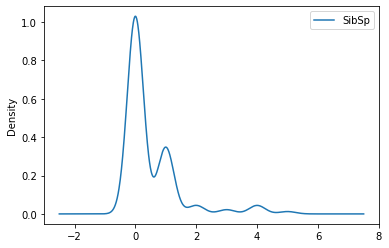

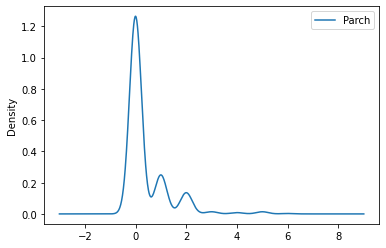

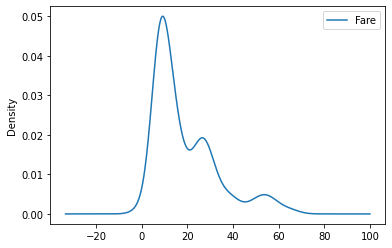

In [42]:
newdata[['Pclass']].plot.kde()
newdata[['Age']].plot.kde()
newdata[['SibSp']].plot.kde()
newdata[['Parch']].plot.kde()
newdata[['Fare']].plot.kde()

<AxesSubplot:>

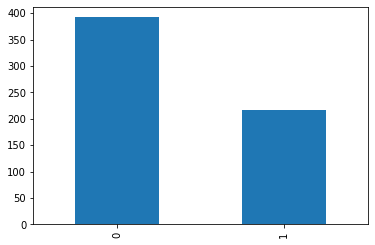

In [43]:
pd.value_counts(newdata['Survived']).plot.bar()

<AxesSubplot:>

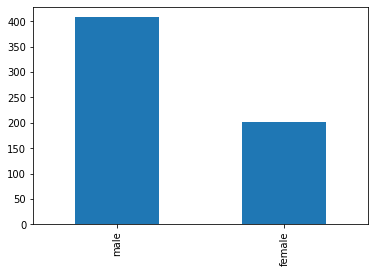

In [44]:
pd.value_counts(newdata['Sex']).plot.bar()

<AxesSubplot:>

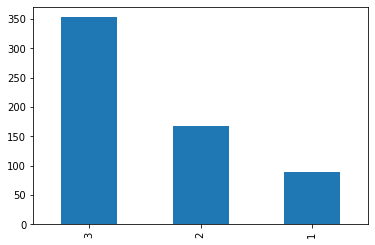

In [45]:
pd.value_counts(newdata['Pclass']).plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

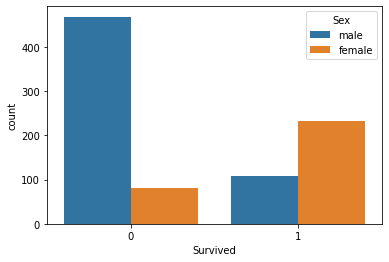

In [46]:

# Out of all the people who survived how many men and how many females
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

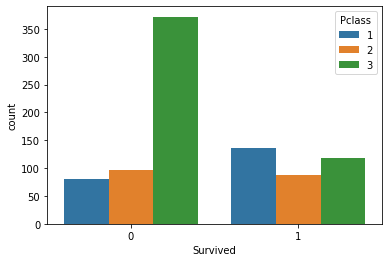

In [47]:

# hue = Pclass
sns.countplot(x="Survived",hue="Pclass",data=data)

### Relationship between the data

#### Correlation

Dataframe correlation is used to find how pair of variables behave with each other.
Correlation varies from -1 to +1. -1 means variables movements ae opposite i.e., if one increases other decreases at the same rate. +1 means variable movements are in sync i.e., if one increases other also increases at same rate. 0 means variable are uncorrelated.
Pandas data frame function provides three kinds of correlations – pearson, kendall and spearman.


Let’s see these correlation matrices:

In [48]:
corr = newdata.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_log
Survived,1.000000,-0.271479,-0.130809,-0.025974,0.098131,0.228695,0.247448
Pclass,-0.271479,1.000000,-0.381791,0.122815,0.108867,-0.597647,-0.641957
Age,-0.130809,-0.381791,1.000000,-0.360578,-0.212952,0.080849,0.073797
SibSp,-0.025974,0.122815,-0.360578,1.000000,0.402079,0.382489,0.419778
Parch,0.098131,0.108867,-0.212952,0.402079,1.000000,0.340278,0.400886
Fare,0.228695,-0.597647,0.080849,0.382489,0.340278,1.000000,0.955339
fare_log,0.247448,-0.641957,0.073797,0.419778,0.400886,0.955339,1.000000


<AxesSubplot:>

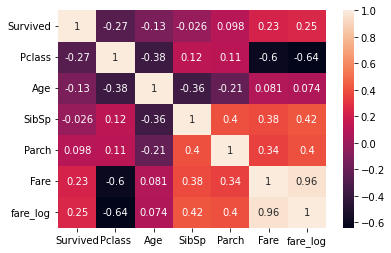

In [49]:
sns.heatmap(corr, annot=True)

In [50]:
corr = newdata.corr(method='pearson')
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_log
Survived,1.000000,-0.271479,-0.130809,-0.025974,0.098131,0.228695,0.247448
Pclass,-0.271479,1.000000,-0.381791,0.122815,0.108867,-0.597647,-0.641957
Age,-0.130809,-0.381791,1.000000,-0.360578,-0.212952,0.080849,0.073797
SibSp,-0.025974,0.122815,-0.360578,1.000000,0.402079,0.382489,0.419778
Parch,0.098131,0.108867,-0.212952,0.402079,1.000000,0.340278,0.400886
Fare,0.228695,-0.597647,0.080849,0.382489,0.340278,1.000000,0.955339
fare_log,0.247448,-0.641957,0.073797,0.419778,0.400886,0.955339,1.000000


<AxesSubplot:>

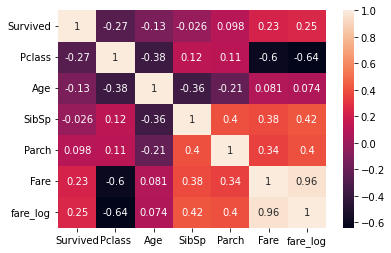

In [51]:
sns.heatmap(corr, annot=True)

In [52]:
corr = newdata.corr('spearman')
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_log
Survived,1.000000,-0.282739,-0.104960,0.059791,0.168304,0.248687,0.245045
Pclass,-0.282739,1.000000,-0.359963,0.018470,0.059367,-0.596141,-0.617123
Age,-0.104960,-0.359963,1.000000,-0.235822,-0.304770,0.079934,0.092720
SibSp,0.059791,0.018470,-0.235822,1.000000,0.472754,0.469199,0.465107
Parch,0.168304,0.059367,-0.304770,0.472754,1.000000,0.457092,0.454375
Fare,0.248687,-0.596141,0.079934,0.469199,0.457092,1.000000,1.000000
fare_log,0.245045,-0.617123,0.092720,0.465107,0.454375,1.000000,1.000000


<AxesSubplot:>

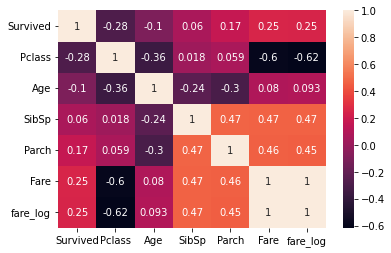

In [53]:
sns.heatmap(corr, annot=True)

In [54]:
corr = newdata.corr('kendall')
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_log
Survived,1.000000,-0.270918,-0.086662,0.057834,0.162771,0.204927,0.201955
Pclass,-0.270918,1.000000,-0.287199,0.018169,0.055773,-0.502663,-0.518887
Age,-0.086662,-0.287199,1.000000,-0.186571,-0.242615,0.058565,0.067951
SibSp,0.057834,0.018169,-0.186571,1.000000,0.445959,0.377850,0.374461
Parch,0.162771,0.055773,-0.242615,0.445959,1.000000,0.368592,0.366317
Fare,0.204927,-0.502663,0.058565,0.377850,0.368592,1.000000,1.000000
fare_log,0.201955,-0.518887,0.067951,0.374461,0.366317,1.000000,1.000000


<AxesSubplot:>

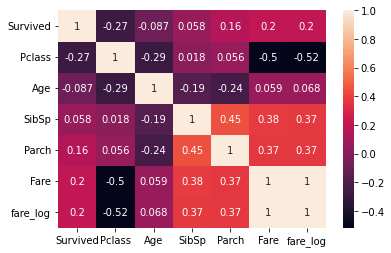

In [55]:
sns.heatmap(corr, annot=True)

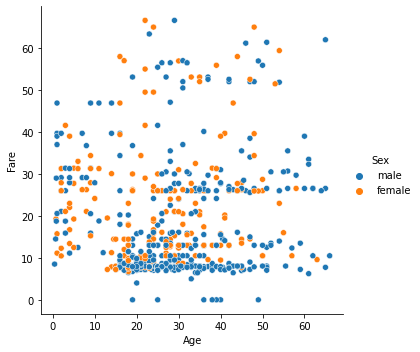

In [56]:
sns.relplot(x='Age',y='Fare', hue='Sex', data=newdata)

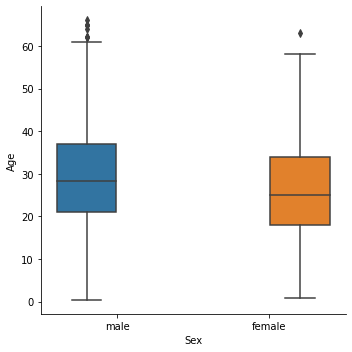

In [57]:
sns.catplot(x='Sex',y='Age', hue='Sex', data=newdata, kind='box')

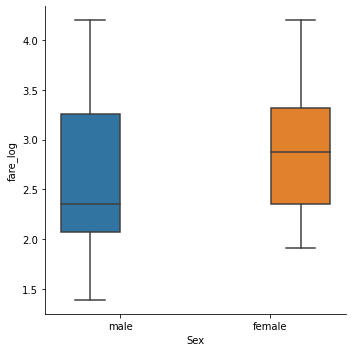

In [58]:
sns.catplot(x='Sex', y='fare_log', hue='Sex', data=newdata, kind='box')

In [59]:
 
# Printing Data
data.head(4)
sex=pd.get_dummies(data['Sex'])
sex.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [60]:
sex=pd.get_dummies(data['Sex'],drop_first=True)  # Dropping the first column
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
# Passenger Class
pcl=pd.get_dummies(data['Pclass'])
pcl.head(5)


,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [62]:
pcl=pd.get_dummies(data['Pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [63]:
# Embarked S, C and Q
embark=pd.get_dummies(data['Embarked'])
embark.head(5)


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [64]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [65]:
# Concatenate all the new rows to Titanic Table Dataset
data=pd.concat([data,sex,embark,pcl],axis=1)
data.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,True,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,True,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,True,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,True,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,True,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [66]:
data.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
              'male',           'Q',           'S',             2,
                   3],
      dtype='object')

In [67]:
# Drop all the unwanted columns
data.drop(['Sex','Name','PassengerId','Ticket','Embarked','Pclass','Fare'],axis=1,inplace=True)
data.head(5)


,Survived,Age,SibSp,Parch,Cabin,male,Q,S,2,3
0,0,True,1,0,NaN,1,0,1,0,1
1,1,True,1,0,C85,0,0,0,0,0
2,1,True,0,0,NaN,0,0,1,0,1
3,1,True,1,0,C123,0,0,1,0,0
4,0,True,0,0,NaN,1,0,1,0,1


In [68]:
#Train and test the data
X=data.drop(['Survived','Cabin','Age'],axis=1)
Y=data['Survived']

In [69]:
X


,SibSp,Parch,male,Q,S,2,3
0,1,0,1,0,1,0,1
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
886,0,0,1,0,1,1,0
887,0,0,0,0,1,0,0
888,1,2,0,0,1,0,1
889,0,0,1,0,0,0,0


In [70]:


# Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=35,random_state=0)

from sklearn.linear_model import LogisticRegression
# Creating Instances
logmodel=LogisticRegression()
#Fit to the model
logmodel.fit(x_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [71]:
# PREDICTION
predictions=logmodel.predict(x_test)
# How my model is performing using the classifications Report
from sklearn.metrics import classification_report
classification_report(y_test,predictions)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


'              precision    recall  f1-score   support\n\n           0       0.84      0.67      0.74       534\n           1       0.59      0.79      0.67       322\n\n    accuracy                           0.71       856\n   macro avg       0.71      0.73      0.71       856\nweighted avg       0.74      0.71      0.72       856\n'

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[356, 178],
       [ 68, 254]])